In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
dataHarmonic = pd.read_csv("dataForHarmonicAudio.csv",usecols=lambda column: column != 'filename')

In [3]:
dataHarmonic.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,pop
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,pop
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,pop
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,pop
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,pop


# Updating datasets y-columns

In [4]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dataHarmonic['genre'] = dataHarmonic['genre'].map(mappingGenresToIntegers)
dataHarmonic.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [6]:
csv_file = 'dataHarmonic_genreChangedToNumbers.csv'
dataHarmonic.to_csv(csv_file, index=False)

# Pre-processing

## Standard scaling and train_test_split

In [7]:
X = dataHarmonic.iloc[:, :-1]
y = dataHarmonic.iloc[:, -1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Using heatmap to see what features are too closely correlated, then removing them as necessary

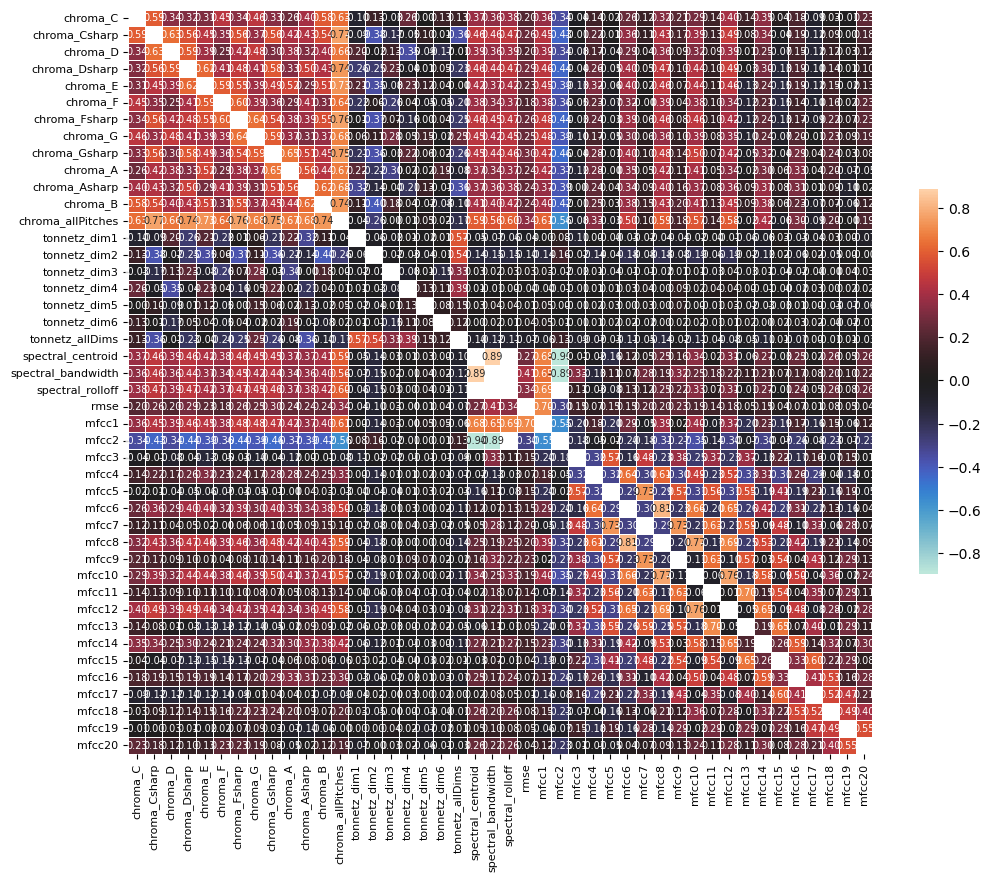

In [10]:
corr = X.corr()

mask = corr.abs() > 0.9

plt.figure(figsize=(12,10))

sns.heatmap(corr, center=0, mask=mask, square=True, linewidths=.4, annot=True, fmt=".2f", annot_kws={"size": 7}, cbar_kws={"shrink": .5})
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

Based on the graph above, spectral_centroid, spectral_bandwidth, and spectral_rolloff are all highly correlated. So, we can just keep one of them.

Based on the graph above, mfcc2 is also highly correlated with spectral_rolloff.

So, we can just keep spectral_rolloff and remove the other 3.

In [11]:
dataHarmonicWithReducedColumns = dataHarmonic.drop(columns=['spectral_bandwidth', 'spectral_centroid', 'mfcc2'])

In [12]:
dataHarmonicWithReducedColumns.shape

(1000, 42)

In [13]:
dataHarmonicWithReducedColumns.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [14]:
csv_file = 'dataHarmonic_reducedColumnsBasedOnCorrelationToEachOther.csv'
dataHarmonicWithReducedColumns.to_csv(csv_file, index=False)

## Randomly choosing features to keep

In [34]:
columns_to_keep = ['rmse', 'tonnetz_allDims', 'spectral_centroid', 'genre'] #specifically choosing features which are different in dataOrig vs dataHarmonic
dataReducedColumns = dataHarmonic[columns_to_keep]
dataReducedColumns.head()

,rmse,tonnetz_allDims,spectral_centroid,genre
0,0.134523,0.041526,2578.901672,0
1,0.125774,0.038170,2624.813690,0
2,0.184841,-0.024535,2914.465143,0
3,0.134669,0.042530,2579.310087,0
4,0.090770,-0.033336,2849.120174,0


In [35]:
csv_file = 'dataHarmonic_reducedColumnsRandom.csv'
dataReducedColumns.to_csv(csv_file, index=False)

# Removing all chroma features 

The chromas in the harmonic are the same as the chromas in the original. So those might not necessarily be needed for this testing.

In [44]:
columnsToKeep = [col for col in dataHarmonic.columns if 'chroma' not in col]

dataReducedColumns = dataHarmonic[columnsToKeep]
dataReducedColumns.head()

,tonnetz_dim1,tonnetz_dim2,tonnetz_dim3,tonnetz_dim4,tonnetz_dim5,tonnetz_dim6,tonnetz_allDims,spectral_centroid,spectral_bandwidth,spectral_rolloff,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.092298,0.109638,-0.010165,0.067054,0.038712,-0.048381,0.041526,2578.901672,3093.308123,6384.120097,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,-0.006052,0.068081,0.090119,0.068515,-0.004434,0.012794,0.038170,2624.813690,3031.844488,6244.770462,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.120270,-0.068952,-0.048086,-0.156026,0.007883,-0.002300,-0.024535,2914.465143,3189.873176,7086.530518,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.093430,0.109086,-0.007735,0.068533,0.040309,-0.048440,0.042530,2579.310087,3091.031145,6375.868200,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,-0.105472,-0.100274,0.085604,-0.095592,-0.005032,0.020751,-0.033336,2849.120174,3124.483585,6707.526159,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [45]:
csv_file = 'dataHarmonic_withoutChromas.csv'
dataReducedColumns.to_csv(csv_file, index=False)

## Only using features most correlated to genre

In [17]:
correlationMatrix = dataHarmonic.corr()
correlationWithGenre = correlationMatrix['genre']
correlationWithGenre = correlationWithGenre.drop('genre')

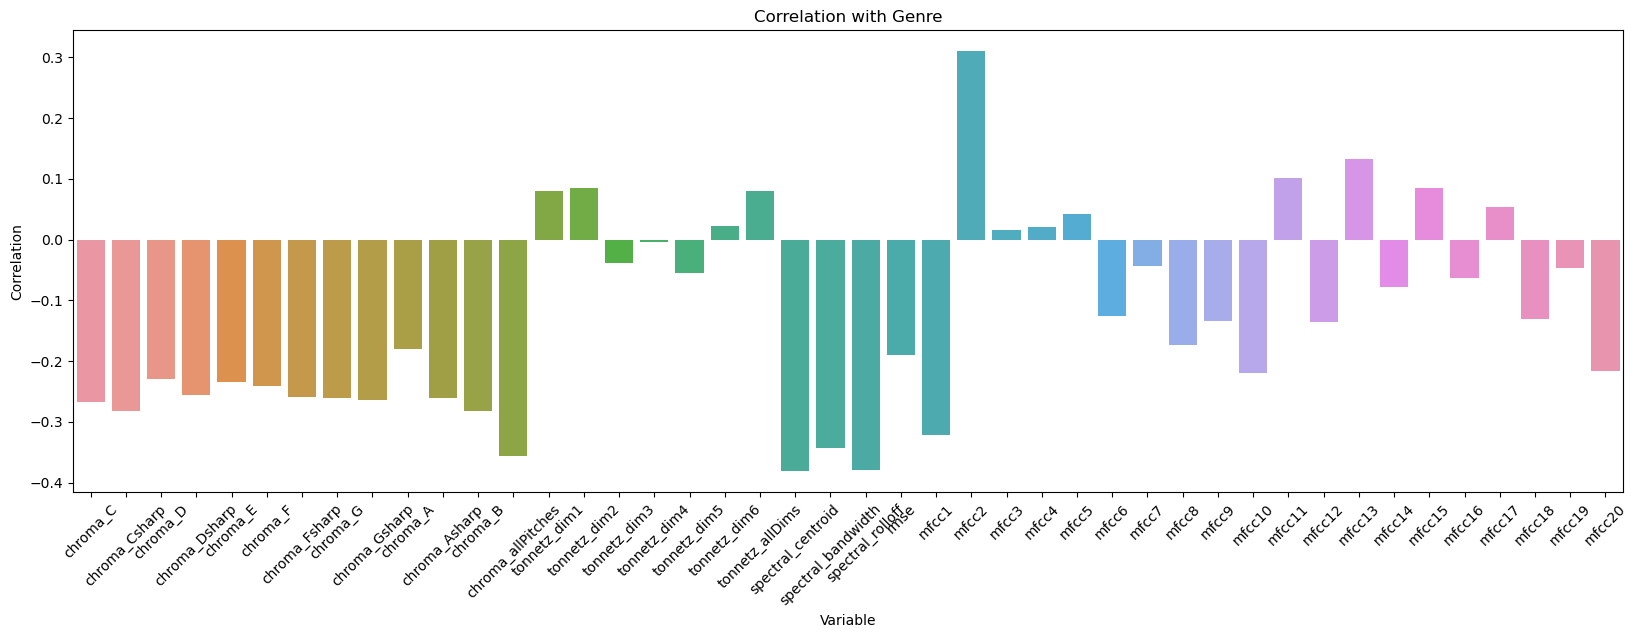

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(x=correlationWithGenre.index, y=correlationWithGenre.values)
plt.title('Correlation with Genre')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [19]:
mostPositive5 = correlationWithGenre.nlargest(5)
print(mostPositive5)

mfcc2           0.310179
mfcc13          0.132915
mfcc11          0.100913
tonnetz_dim2    0.085719
mfcc15          0.085100
Name: genre, dtype: float64


In [20]:
dataHarmonicWithMostCorrelatedFeatures = dataHarmonic[['mfcc2', 'mfcc13', 'mfcc11', 'tonnetz_dim2', 'mfcc15', 'genre']]
dataHarmonicWithMostCorrelatedFeatures.head()

,mfcc2,mfcc13,mfcc11,tonnetz_dim2,mfcc15,genre
0,78.507446,2.695709,5.424820,0.109638,0.632315,0
1,75.377258,6.827752,3.959301,0.068081,3.366904,0
2,67.967308,-2.048577,-2.602422,-0.068952,-3.732610,0
3,78.425529,2.670471,5.402005,0.109086,0.699207,0
4,61.275467,-1.642580,-2.535092,-0.100274,-3.302547,0


In [21]:
csv_file = 'dataHarmonic_reducedColumnsBasedOnCorrelationToGenre.csv'
dataHarmonicWithMostCorrelatedFeatures.to_csv(csv_file, index=False)

## Removing outliers

In [22]:
columns = list(range(X.shape[1]))
data_in_columns = X.iloc[:, columns]

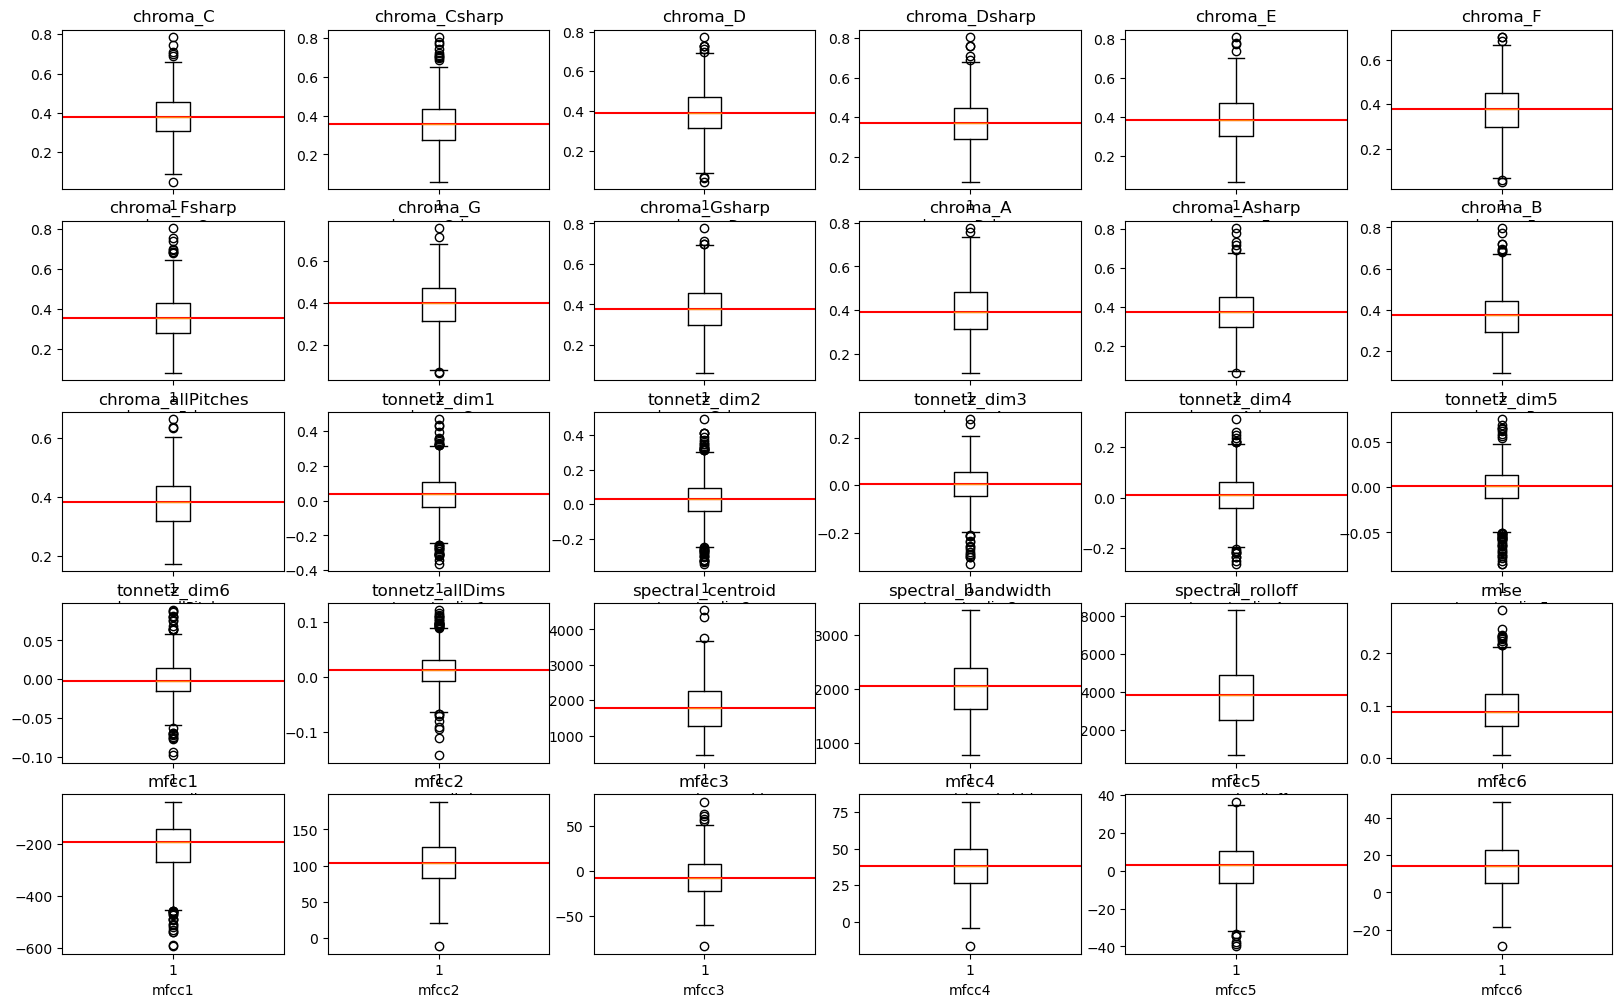

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    if i < len(columns):
        ax.boxplot(data_in_columns.iloc[:, i])
        ax.set_title(f'{data_in_columns.columns[i]}')
        ax.axhline(y=data_in_columns.iloc[:, i].median(), color='r')
        ax.set_xlabel(data_in_columns.columns[i])
    else:
        ax.set_visible(False)


plt.show()

In [24]:
thresholds = data_in_columns.quantile([0.25, 0.75])
iqr = 1.5 * (thresholds.loc[0.75] - thresholds.loc[0.25])

dataWithoutOutliers = dataHarmonic.copy()

for col in data_in_columns.columns:
    lower = thresholds.loc[0.25, col] - iqr.loc[col]
    upper = thresholds.loc[0.75, col] + iqr.loc[col]
    dataWithoutOutliers[col] = np.where((dataWithoutOutliers[col] < lower) | (dataWithoutOutliers[col] > upper), np.nan, dataWithoutOutliers[col])

dataWithoutOutliers = dataWithoutOutliers.dropna()

In [25]:
dataWithoutOutliers.shape

(740, 45)

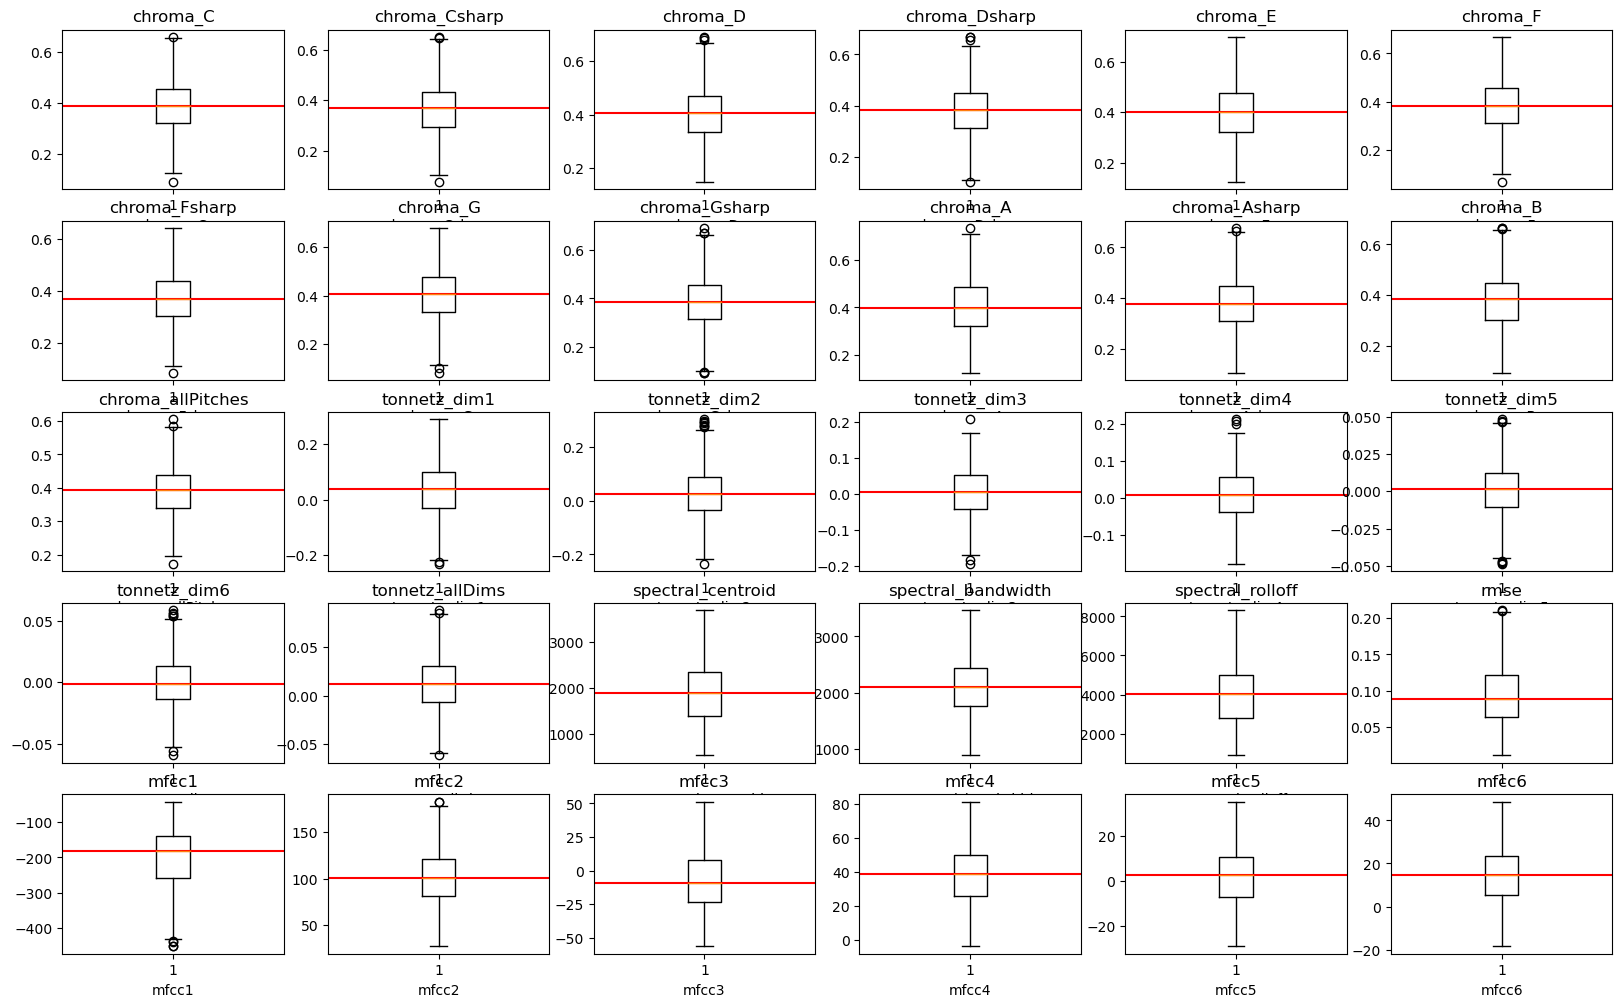

In [26]:
X = dataWithoutOutliers.iloc[:, :-1]
y = dataWithoutOutliers.iloc[:, -1]

columns = list(range(X.shape[1]))
data_in_columns = X.iloc[:, columns]

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    if i < len(columns):
        ax.boxplot(data_in_columns.iloc[:, i])
        ax.set_title(f'{data_in_columns.columns[i]}')
        ax.axhline(y=data_in_columns.iloc[:, i].median(), color='r')
        ax.set_xlabel(data_in_columns.columns[i])
    else:
        ax.set_visible(False)


plt.show()

In [27]:
dataWithoutOutliers.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [28]:
dataWithoutOutliers.shape

(740, 45)

In [29]:
csv_file = 'dataHarmonic_withoutOutliers.csv'
dataWithoutOutliers.to_csv(csv_file, index=False)

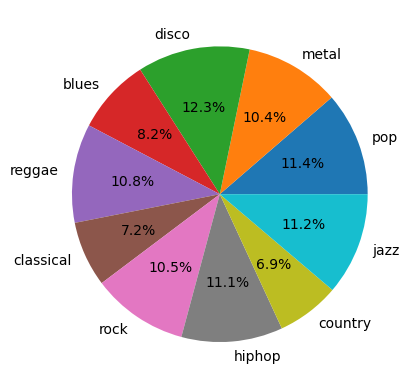

In [30]:
labels = [
    'pop',
    'metal',
    'disco',
    'blues',
    'reggae',
    'classical',
    'rock',
    'hiphop',
    'country',
    'jazz'
]

sizes = np.unique(y,return_counts=True)[1]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

## Only testing with certain genres

### Part 1 - Randomly separating the genres

In [31]:
dataMetalOrReggae = dataHarmonic[dataHarmonic.iloc[:, -1].isin([1, 4])]
dataMetalOrReggae.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
100,0.197645,0.253560,0.530577,0.676284,0.603167,0.416595,0.469057,0.586434,0.534654,0.490844,...,3.106380,-5.482180,-3.721103,2.062520,5.397898,-2.783332,-2.303997,5.608458,-2.078828,1
101,0.555681,0.554876,0.646270,0.524454,0.509183,0.502343,0.473830,0.506142,0.482216,0.537800,...,13.270273,-6.233259,6.815860,-4.593929,8.090997,-3.150598,7.384811,3.013946,2.752292,1
102,0.412719,0.367689,0.338250,0.434104,0.592827,0.422646,0.298741,0.387750,0.440941,0.507487,...,2.069035,0.510632,0.080939,-5.362499,1.468842,-5.070672,-3.474967,4.940016,-6.387615,1
103,0.491189,0.567155,0.589308,0.469433,0.495655,0.505738,0.592601,0.645546,0.479652,0.420058,...,12.123793,-7.780693,1.680955,-3.062496,5.239401,-5.106991,5.147161,2.171933,5.962196,1
104,0.455604,0.366034,0.405422,0.474057,0.520951,0.465351,0.575677,0.598739,0.511573,0.469804,...,10.866733,-18.028728,8.665884,-13.761690,1.942730,-13.207386,-1.109173,-7.485201,-0.156378,1


In [32]:
csv_file = 'dataHarmonic_metal_reggae.csv'
dataMetalOrReggae.to_csv(csv_file, index=False)

In [36]:
dataPopOrDisco = dataHarmonic[dataHarmonic.iloc[:, -1].isin([0, 2])]
dataPopOrDisco.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [37]:
csv_file = 'dataHarmonic_pop_disco.csv'
dataPopOrDisco.to_csv(csv_file, index=False)

In [38]:
dataRockOrCountry = dataHarmonic[dataHarmonic.iloc[:, -1].isin([6, 8])]
dataRockOrCountry.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
600,0.394059,0.350094,0.455285,0.364732,0.564776,0.350641,0.432859,0.344357,0.416916,0.694107,...,-0.242496,-5.259532,-7.021712,-1.785745,3.555577,-1.510393,-5.604460,-7.935923,-7.467279,6
601,0.338946,0.288647,0.318111,0.380675,0.602792,0.458370,0.379182,0.356645,0.397867,0.506765,...,8.192137,-7.457729,4.089225,-11.708560,-0.874860,-11.043322,-2.239176,-11.976329,-6.407169,6
602,0.465354,0.395574,0.452946,0.348066,0.293899,0.265719,0.299983,0.422719,0.330956,0.396222,...,7.607629,-2.665348,3.793905,-9.097589,-4.160104,-14.697496,-10.213312,-1.749084,-4.520202,6
603,0.563634,0.504108,0.516254,0.358893,0.344161,0.366845,0.407865,0.474683,0.347970,0.385865,...,-0.484310,0.535433,4.034620,0.367811,-4.342974,-4.856856,-5.691894,-7.455070,-5.440581,6
604,0.544997,0.313132,0.314725,0.225910,0.378880,0.547735,0.607361,0.536730,0.297946,0.286034,...,3.831379,-1.391306,0.950966,-5.518534,-15.643259,-15.280667,-5.576809,6.902032,5.166097,6


In [39]:
csv_file = 'dataHarmonic_rock_country.csv'
dataRockOrCountry.to_csv(csv_file, index=False)

### Using PCA and TSNE to analyze which features to keep

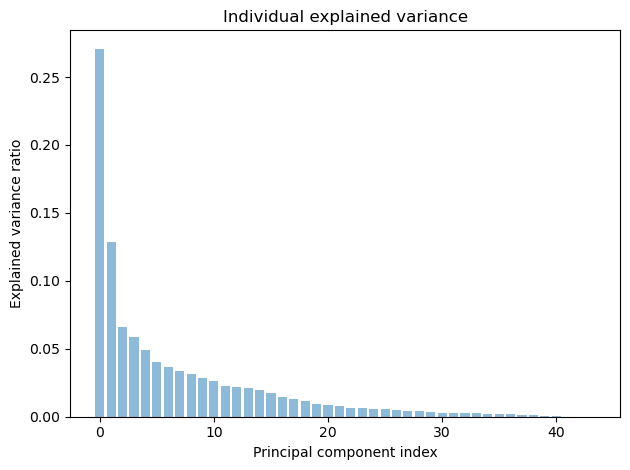

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

X = dataHarmonic.iloc[:, :-1]
y = dataHarmonic.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123)

sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_train)
X_scaled_test = sc.transform(X_test)

pca = PCA()
transformed = pca.fit_transform(X_scaled_train)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("Individual explained variance")
plt.tight_layout()
plt.show()

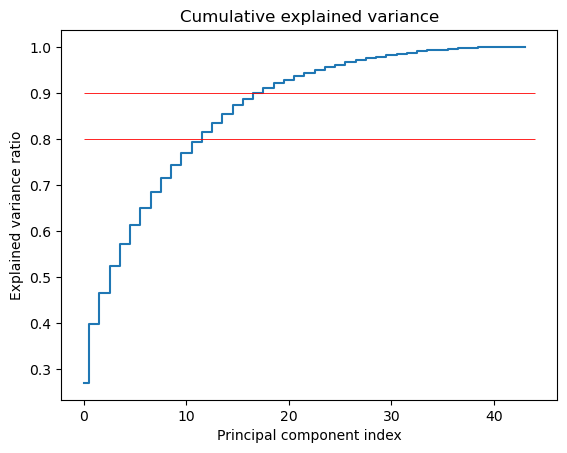

In [47]:
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.hlines(0.8, xmin=0, xmax=len(cum_sum_eigenvalues), color='red', linewidth=.6)
plt.hlines(0.9, xmin=0, xmax=len(cum_sum_eigenvalues), color='red', linewidth=.6)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("Cumulative explained variance")
plt.show()

The main difference between the two plots lies in what they visualize:

Individual Explained Variance Plot:

The first plot, generated with plt.bar(), displays the explained variance ratio for each individual principal component.
Each bar in this plot represents the proportion of total variance explained by a single principal component.
This plot helps in understanding the relative importance of each principal component in explaining the variance in the data.
Cumulative Explained Variance Plot:

The second plot, created with plt.step(), illustrates the cumulative explained variance ratio.
It shows how much of the total variance in the dataset is explained as the number of principal components increases.
The steps in this plot indicate the incremental contribution of each principal component to the total explained variance.
Horizontal lines are added at specific percentages (e.g., 80% and 90%) to indicate where certain thresholds of cumulative explained variance are reached.
This plot helps in determining the number of principal components needed to retain a certain amount of variance in the data, which is crucial for dimensionality reduction or feature selection purposes.


In [48]:
n_comps = 11
pca = PCA(n_components=n_comps)
X_train_pca_transformed = pca.fit_transform(X_scaled_train)
X_train_pca_transformed = pd.DataFrame(X_train_pca_transformed, index=X_train.index, columns=[f'PCA_{n}' for n in range(1,n_comps+1)])
X_train_pca_transformed.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11
498,1.889844,-1.132809,-1.390808,-0.348213,1.314841,2.132939,0.446332,-0.516962,0.351832,-0.112454,-1.006213
243,1.780550,-2.445040,-0.408039,-0.799262,0.786544,0.593917,-2.737771,-1.120509,-0.170157,0.869392,-0.840443
314,-0.137805,-2.642708,-0.024292,1.404119,-2.609642,1.304243,-0.479718,3.626543,-1.224157,1.326171,-0.705150
202,2.860211,-3.608150,1.502556,1.700038,-2.555986,-0.533620,-0.565111,0.947315,0.298216,1.082859,-1.569191
300,1.782721,-3.470628,0.470917,0.807198,-1.146921,-0.840710,-0.651041,1.800348,-0.749526,0.828125,0.192770


In [49]:
combined = pd.concat([X_train_pca_transformed, y_train], axis=1)
combined.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,genre
498,1.889844,-1.132809,-1.390808,-0.348213,1.314841,2.132939,0.446332,-0.516962,0.351832,-0.112454,-1.006213,4
243,1.780550,-2.445040,-0.408039,-0.799262,0.786544,0.593917,-2.737771,-1.120509,-0.170157,0.869392,-0.840443,2
314,-0.137805,-2.642708,-0.024292,1.404119,-2.609642,1.304243,-0.479718,3.626543,-1.224157,1.326171,-0.705150,3
202,2.860211,-3.608150,1.502556,1.700038,-2.555986,-0.533620,-0.565111,0.947315,0.298216,1.082859,-1.569191,2
300,1.782721,-3.470628,0.470917,0.807198,-1.146921,-0.840710,-0.651041,1.800348,-0.749526,0.828125,0.192770,3


In [50]:
csv_file = 'dataHarmonic_pcaUsingAllFeatures.csv'
combined.to_csv(csv_file, index=False)

In [53]:
from sklearn.manifold import TSNE
n_comps = 3
tsne = TSNE(n_components=n_comps,perplexity=10)
X_train_tsne_transformed = tsne.fit_transform(X_scaled_train)
X_train_tsne_transformed = pd.DataFrame(X_train_tsne_transformed, index=X_train.index, columns=[f'TSNE_{n}' for n in range(1,n_comps+1)])
X_train_tsne_transformed.head()

,TSNE_1,TSNE_2,TSNE_3
498,5.487901,-5.399283,-7.655029
243,7.600371,-5.266280,2.857153
314,8.702630,-15.484571,3.547534
202,10.903617,-15.784562,-1.292100
300,6.464737,-16.801422,3.762280


In [54]:
combinedTSNE = pd.concat([X_train_tsne_transformed, y_train], axis=1)
combinedTSNE.head()

,TSNE_1,TSNE_2,TSNE_3,genre
498,5.487901,-5.399283,-7.655029,4
243,7.600371,-5.266280,2.857153,2
314,8.702630,-15.484571,3.547534,3
202,10.903617,-15.784562,-1.292100,2
300,6.464737,-16.801422,3.762280,3


In [55]:
csv_file = 'dataHarmonic_tsneUsingAllFeatures.csv'
combinedTSNE.to_csv(csv_file, index=False)

### Also going to use PCA and TSNE to figure out which genres to use for most variance in data

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_22419/515760855.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_pca[:,0][y_test==i], trans_pca[:,1][y_test==i], cmap='jet',label=f'{genres[i]}')


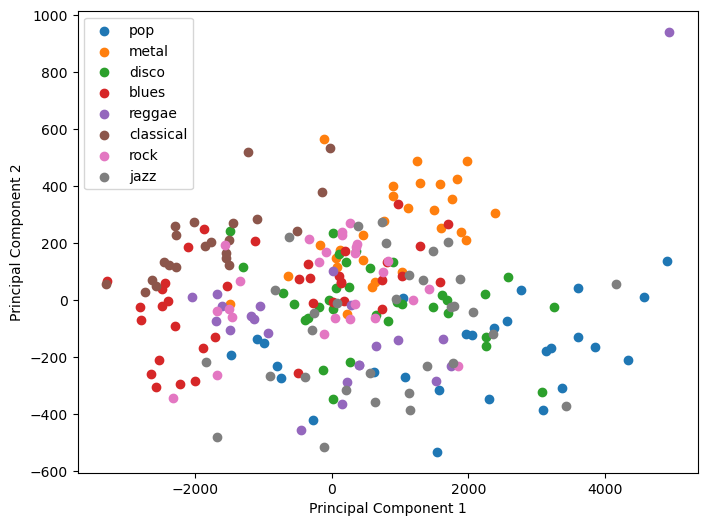

In [60]:
pca = PCA(10)
pca.fit(X_train)
trans_pca = pca.fit_transform(X_test)

#genres=['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']

genres=['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(trans_pca[:,0][y_test==i], trans_pca[:,1][y_test==i], cmap='jet',label=f'{genres[i]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_22419/3138321272.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_tsne[:,0][y_test==i], trans_tsne[:,1][y_test==i], cmap='jet',label=f'{genres[i]}')


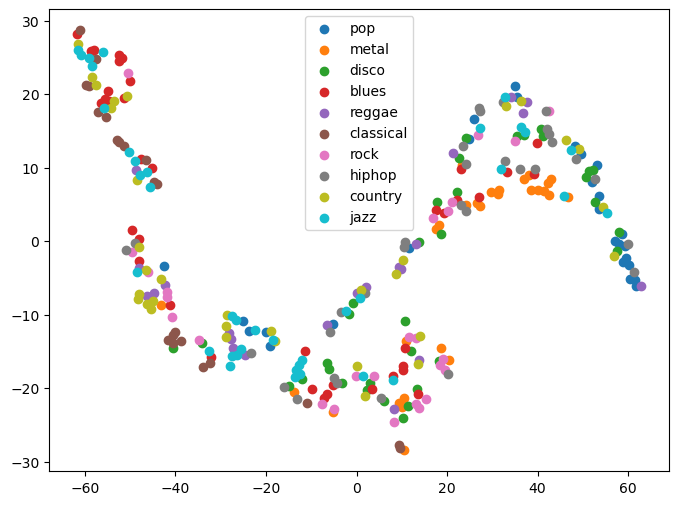

In [57]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=10)
trans_tsne = tsne.fit_transform(X_test)

genres=['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(trans_tsne[:,0][y_test==i], trans_tsne[:,1][y_test==i], cmap='jet',label=f'{genres[i]}')
plt.legend()
plt.show()

Based on the two graphs, the only ones that seem seperable are pop and classical. They are separate clusters and there is a lot of variance

In [61]:
genreNames = ['pop', 'classical']
genreNumbers = [0, 5]


dataSpecifiedGenres = dataHarmonic[dataHarmonic.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.shape

(200, 45)

In [62]:
dataSpecifiedGenres.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [63]:
csv_file = 'dataHarmonic_pop_classical.csv'
dataSpecifiedGenres.to_csv(csv_file, index=False)

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_22419/1749815973.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_pca[:,0][y_test_specifiedGenres==genreNum], trans_pca[:,1][y_test_specifiedGenres==genreNum], cmap='jet',label=f'{genreNames[i]}')


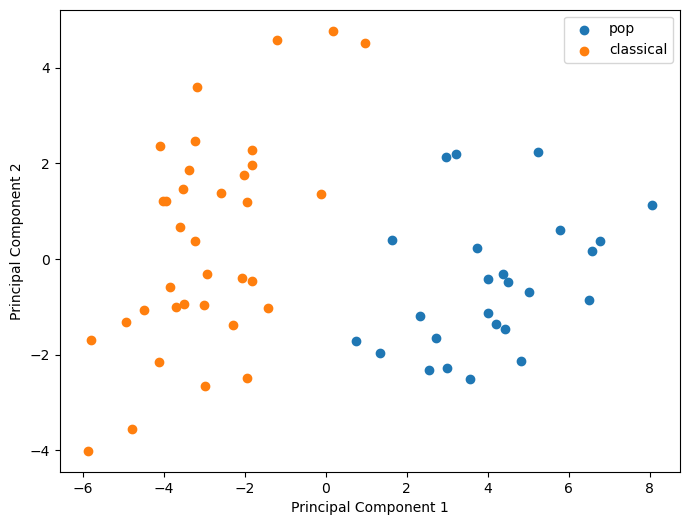

In [64]:
X_specifiedGenres = dataSpecifiedGenres.iloc[:, :-1]
y_specifiedGenres = dataSpecifiedGenres.iloc[:, -1]

X_train_specifiedGenres, X_test_specifiedGenres, y_train_specifiedGenres, y_test_specifiedGenres = train_test_split(X_specifiedGenres, y_specifiedGenres, test_size=0.3, shuffle=True, random_state=123)

sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_train_specifiedGenres)
X_scaled_test = sc.transform(X_test_specifiedGenres)

pca = PCA(10)
pca.fit(X_scaled_train)
trans_pca = pca.fit_transform(X_scaled_test)


plt.figure(figsize=(8, 6))
for i, genreNum in enumerate(genreNumbers):
    plt.scatter(trans_pca[:,0][y_test_specifiedGenres==genreNum], trans_pca[:,1][y_test_specifiedGenres==genreNum], cmap='jet',label=f'{genreNames[i]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Also going to use PCA and TSNE to figure out which genres to use for most variance in data. Same section as above, but this time we'll split dataHarmonic into 2 subsections of genres

## genres = ['classical','hiphop','metal', 'disco', 'reggae']

In [73]:
genreNames = ['classical','hiphop','metal', 'disco', 'reggae']
genreNumbers = [5, 7, 1, 2, 4]

dataSpecifiedGenres = dataHarmonic[dataHarmonic.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.shape

(500, 45)

In [74]:
dataSpecifiedGenres.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
100,0.197645,0.253560,0.530577,0.676284,0.603167,0.416595,0.469057,0.586434,0.534654,0.490844,...,3.106380,-5.482180,-3.721103,2.062520,5.397898,-2.783332,-2.303997,5.608458,-2.078828,1
101,0.555681,0.554876,0.646270,0.524454,0.509183,0.502343,0.473830,0.506142,0.482216,0.537800,...,13.270273,-6.233259,6.815860,-4.593929,8.090997,-3.150598,7.384811,3.013946,2.752292,1
102,0.412719,0.367689,0.338250,0.434104,0.592827,0.422646,0.298741,0.387750,0.440941,0.507487,...,2.069035,0.510632,0.080939,-5.362499,1.468842,-5.070672,-3.474967,4.940016,-6.387615,1
103,0.491189,0.567155,0.589308,0.469433,0.495655,0.505738,0.592601,0.645546,0.479652,0.420058,...,12.123793,-7.780693,1.680955,-3.062496,5.239401,-5.106991,5.147161,2.171933,5.962196,1
104,0.455604,0.366034,0.405422,0.474057,0.520951,0.465351,0.575677,0.598739,0.511573,0.469804,...,10.866733,-18.028728,8.665884,-13.761690,1.942730,-13.207386,-1.109173,-7.485201,-0.156378,1


/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_22419/1749815973.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_pca[:,0][y_test_specifiedGenres==genreNum], trans_pca[:,1][y_test_specifiedGenres==genreNum], cmap='jet',label=f'{genreNames[i]}')


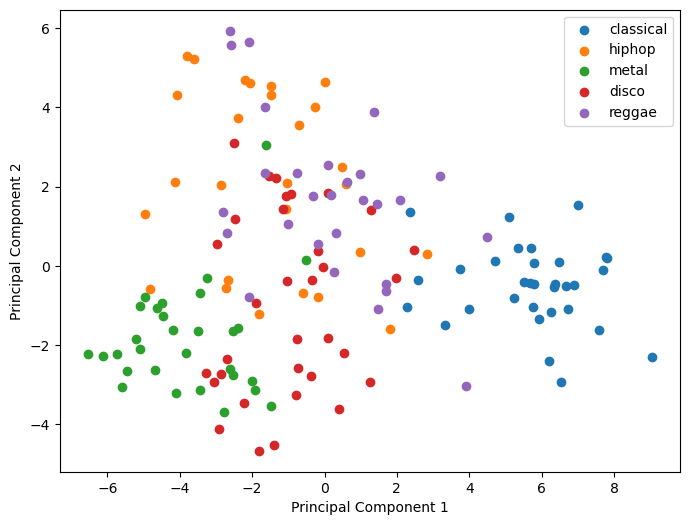

In [67]:
X_specifiedGenres = dataSpecifiedGenres.iloc[:, :-1]
y_specifiedGenres = dataSpecifiedGenres.iloc[:, -1]

X_train_specifiedGenres, X_test_specifiedGenres, y_train_specifiedGenres, y_test_specifiedGenres = train_test_split(X_specifiedGenres, y_specifiedGenres, test_size=0.3, shuffle=True, random_state=123)

sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_train_specifiedGenres)
X_scaled_test = sc.transform(X_test_specifiedGenres)

pca = PCA(10)
pca.fit(X_scaled_train)
trans_pca = pca.fit_transform(X_scaled_test)


plt.figure(figsize=(8, 6))
for i, genreNum in enumerate(genreNumbers):
    plt.scatter(trans_pca[:,0][y_test_specifiedGenres==genreNum], trans_pca[:,1][y_test_specifiedGenres==genreNum], cmap='jet',label=f'{genreNames[i]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_22419/1650034879.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_tsne[:,0][y_test_specifiedGenres==genre], trans_tsne[:,1][y_test_specifiedGenres==genre], cmap='jet',label=f'{genreNames[i]}')


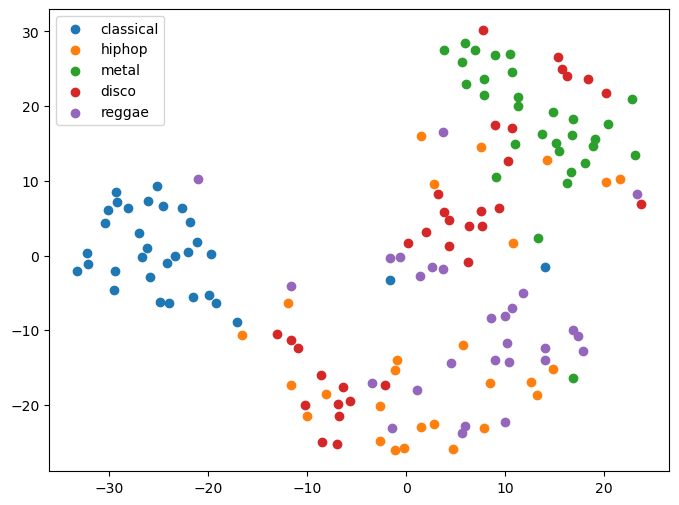

In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=10)
trans_tsne = tsne.fit_transform(X_scaled_test)


plt.figure(figsize=(8, 6))
for i, genre in enumerate(genreNumbers):
    plt.scatter(trans_tsne[:,0][y_test_specifiedGenres==genre], trans_tsne[:,1][y_test_specifiedGenres==genre], cmap='jet',label=f'{genreNames[i]}')
plt.legend()
plt.show()

Based on the PCA and TSNE graphs, it seems classical, metal, and reggae would be well seperable

In [69]:
genreNames = ['classical', 'metal', 'reggae']
genreNumbers = [5, 1, 4]

dataSpecifiedGenres = dataHarmonic[dataHarmonic.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
100,0.197645,0.253560,0.530577,0.676284,0.603167,0.416595,0.469057,0.586434,0.534654,0.490844,...,3.106380,-5.482180,-3.721103,2.062520,5.397898,-2.783332,-2.303997,5.608458,-2.078828,1
101,0.555681,0.554876,0.646270,0.524454,0.509183,0.502343,0.473830,0.506142,0.482216,0.537800,...,13.270273,-6.233259,6.815860,-4.593929,8.090997,-3.150598,7.384811,3.013946,2.752292,1
102,0.412719,0.367689,0.338250,0.434104,0.592827,0.422646,0.298741,0.387750,0.440941,0.507487,...,2.069035,0.510632,0.080939,-5.362499,1.468842,-5.070672,-3.474967,4.940016,-6.387615,1
103,0.491189,0.567155,0.589308,0.469433,0.495655,0.505738,0.592601,0.645546,0.479652,0.420058,...,12.123793,-7.780693,1.680955,-3.062496,5.239401,-5.106991,5.147161,2.171933,5.962196,1
104,0.455604,0.366034,0.405422,0.474057,0.520951,0.465351,0.575677,0.598739,0.511573,0.469804,...,10.866733,-18.028728,8.665884,-13.761690,1.942730,-13.207386,-1.109173,-7.485201,-0.156378,1


In [70]:
csv_file = 'dataHarmonic_metal_classical_reggae.csv'
dataSpecifiedGenres.to_csv(csv_file, index=False)

In [71]:
X_specifiedGenres = dataSpecifiedGenres.iloc[:, :-1]
y_specifiedGenres = dataSpecifiedGenres.iloc[:, -1]

X_train_specifiedGenres, X_test_specifiedGenres, y_train_specifiedGenres, y_test_specifiedGenres = train_test_split(X_specifiedGenres, y_specifiedGenres, test_size=0.3, shuffle=True, random_state=123)

sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_train_specifiedGenres)
X_scaled_test = sc.transform(X_test_specifiedGenres)

n_comps = 10
pca = PCA(n_components=n_comps)
X_train_pca_transformed = pca.fit_transform(X_scaled_train)
X_train_pca_transformed = pd.DataFrame(X_train_pca_transformed, index=X_train_specifiedGenres.index, columns=[f'PCA_{n}' for n in range(1,n_comps+1)])
combined = pd.concat([X_train_pca_transformed, y_train_specifiedGenres], axis=1)
combined.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,genre
546,-4.605069,-0.690507,0.653824,2.445444,-0.595495,-0.303372,0.447039,-0.674045,0.620522,-0.938452,5
425,7.139439,3.189815,-3.198116,0.872187,-0.433172,-3.440228,-2.754955,-2.453309,-0.230602,2.727840,4
558,-5.152788,-1.741236,-0.941937,2.515760,-1.092446,0.248504,-0.117536,0.919925,0.099403,0.420125,5
541,-1.854524,1.894538,7.775021,0.446056,0.013925,-3.299666,5.748174,2.121862,-2.173601,0.380096,5
137,5.011767,-2.018207,0.189366,-0.360861,-0.513012,0.843651,-0.020881,0.080050,-0.272779,0.989581,1


In [72]:
csv_file = 'dataHarmonic_pcaUsingMetalAndClassicalAndReggae.csv'
combined.to_csv(csv_file, index=False)

## genres = ['pop','rock','country', 'jazz', 'blues']

In [76]:
genreNames = ['pop','rock','country', 'jazz', 'blues']
genreNumbers = [0, 6, 8, 9, 3]

dataSpecifiedGenres = dataHarmonic[dataHarmonic.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.shape

(500, 45)

In [77]:
dataSpecifiedGenres.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_22419/1749815973.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_pca[:,0][y_test_specifiedGenres==genreNum], trans_pca[:,1][y_test_specifiedGenres==genreNum], cmap='jet',label=f'{genreNames[i]}')


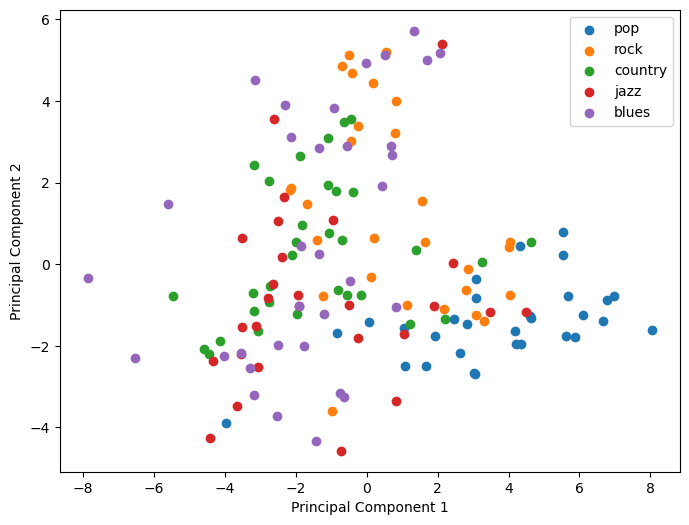

In [78]:
X_specifiedGenres = dataSpecifiedGenres.iloc[:, :-1]
y_specifiedGenres = dataSpecifiedGenres.iloc[:, -1]

X_train_specifiedGenres, X_test_specifiedGenres, y_train_specifiedGenres, y_test_specifiedGenres = train_test_split(X_specifiedGenres, y_specifiedGenres, test_size=0.3, shuffle=True, random_state=123)

sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_train_specifiedGenres)
X_scaled_test = sc.transform(X_test_specifiedGenres)

pca = PCA(10)
pca.fit(X_scaled_train)
trans_pca = pca.fit_transform(X_scaled_test)


plt.figure(figsize=(8, 6))
for i, genreNum in enumerate(genreNumbers):
    plt.scatter(trans_pca[:,0][y_test_specifiedGenres==genreNum], trans_pca[:,1][y_test_specifiedGenres==genreNum], cmap='jet',label=f'{genreNames[i]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/var/folders/0x/03rs5r5937b7qn04t9mql34c0000gn/T/ipykernel_22419/1650034879.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans_tsne[:,0][y_test_specifiedGenres==genre], trans_tsne[:,1][y_test_specifiedGenres==genre], cmap='jet',label=f'{genreNames[i]}')


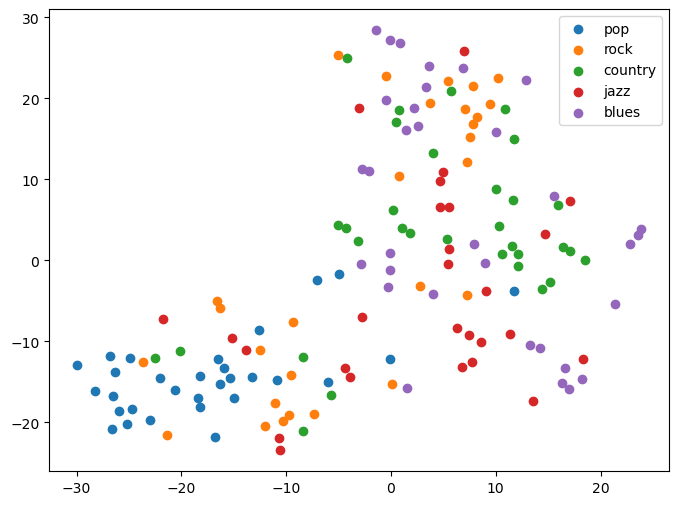

In [79]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=10)
trans_tsne = tsne.fit_transform(X_scaled_test)


plt.figure(figsize=(8, 6))
for i, genre in enumerate(genreNumbers):
    plt.scatter(trans_tsne[:,0][y_test_specifiedGenres==genre], trans_tsne[:,1][y_test_specifiedGenres==genre], cmap='jet',label=f'{genreNames[i]}')
plt.legend()
plt.show()

Based on the PCA and TSNE graphs, it seems pop and blues would be well seperable

In [80]:
genreNames = ['pop', 'blues']
genreNumbers = [0, 3]

dataSpecifiedGenres = dataHarmonic[dataHarmonic.iloc[:, -1].isin(genreNumbers)]
dataSpecifiedGenres.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,0.164212,2.695709,1.318642,0.632315,0.957001,-1.566437,6.275709,7.807974,6.363476,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,5.130442,6.827752,3.071533,3.366904,-2.422404,-2.135466,-3.336569,-0.564991,-3.893568,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,1.111607,-2.048577,-4.366745,-3.732610,-3.398216,2.417332,1.289159,7.578645,4.909898,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,0.235207,2.670471,1.338333,0.699207,1.112011,-1.565463,6.195435,7.648764,6.243628,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.269821,-1.642580,-4.781828,-3.302547,-4.714705,-3.559506,-3.702941,-4.042264,0.333003,0


In [81]:
csv_file = 'dataHarmonic_pop_blues.csv'
dataSpecifiedGenres.to_csv(csv_file, index=False)

In [82]:
X_specifiedGenres = dataSpecifiedGenres.iloc[:, :-1]
y_specifiedGenres = dataSpecifiedGenres.iloc[:, -1]

X_train_specifiedGenres, X_test_specifiedGenres, y_train_specifiedGenres, y_test_specifiedGenres = train_test_split(X_specifiedGenres, y_specifiedGenres, test_size=0.3, shuffle=True, random_state=123)

sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_train_specifiedGenres)
X_scaled_test = sc.transform(X_test_specifiedGenres)

n_comps = 10
pca = PCA(n_components=n_comps)
X_train_pca_transformed = pca.fit_transform(X_scaled_train)
X_train_pca_transformed = pd.DataFrame(X_train_pca_transformed, index=X_train_specifiedGenres.index, columns=[f'PCA_{n}' for n in range(1,n_comps+1)])
combined = pd.concat([X_train_pca_transformed, y_train_specifiedGenres], axis=1)
combined.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,genre
81,-5.498554,0.830517,0.091542,-0.140654,-0.357559,-0.345632,-0.916265,2.474686,0.817394,0.626211,0
307,8.751488,-1.247019,-1.718489,-3.779462,-2.156555,2.804394,-1.368227,0.779205,0.420287,-0.697638,3
312,1.078932,3.138571,-1.787173,1.589091,0.241267,-1.568161,0.367326,1.294479,0.064500,0.559610,3
345,5.548951,-1.898747,3.716181,-0.607476,0.967249,-1.655927,-0.615706,1.073226,1.009114,-0.587414,3
8,-3.659586,-1.645936,0.464999,-0.672115,-1.021927,-0.172997,-0.272511,0.291270,-0.664950,1.712613,0


In [83]:
csv_file = 'dataHarmonic_pcaUsingPopAndBlues.csv'
combined.to_csv(csv_file, index=False)